In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfs = {}

In [3]:
scens = ['historical', 'rcp45', 'rcp85']

In [4]:
for scen in scens:
    dfs[scen] = pd.read_csv(f'../../pickles/Amravati/Amravati_ALL21_{scen}_df.csv')
    dfs[scen].drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df = pd.concat(dfs.values())

In [6]:
df['time'] = df.time.astype('datetime64[ns]')

In [7]:
df['yday'] = df.time.dt.dayofyear

In [8]:
df['month']  = df.time.dt.month

In [9]:
df['year'] = df.time.dt.year

In [10]:
def get_seas(month):
    if month in [12, 1, 2]:
        seas = 'DJF'
    elif month in [3, 4, 5]:
        seas = 'MAM'
    elif month in [6, 7, 8, 9]:
        seas = 'JJAS'
    elif month in [10, 11]:
        seas = 'ON'
        
    return(seas)
        

In [11]:
df['seas'] = df['month'].apply(get_seas)

In [12]:
def get_tslice(year):
    if year in range(1976, 2006):
        tslice = 'baseline'
    elif year < 1976:
        tslice = 'baseline-remain'
    elif year in range(2006, 2021):
        tslice = '2006-2020'
    elif year in range(2021, 2051):
        tslice = 'near'
    elif year in range(2051, 2061):
        tslice = '2051-2061'
    elif year in range(2061, 2091):
        tslice = 'far'
    elif year > 2090:
        tslice = 'end-of-century'
        
    return(tslice)

In [13]:
df['tslice'] = df.year.apply(get_tslice)

In [14]:
df.to_csv('../../pickles/Amravati/Amravati_ALL21_allscens_df.csv', index=False)

In [15]:
df.to_pickle('../../pickles/Amravati/Amravati_ALL21_allscens_df.pkl')

In [18]:
import seaborn as sns
import numpy as np

In [19]:
df = df.loc[np.isin(df.tslice, ['baseline', 'near', 'far'])]

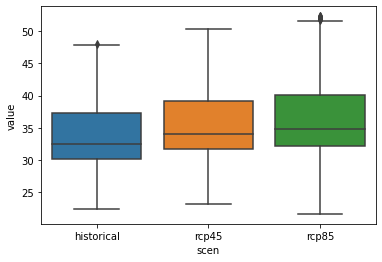

In [20]:
sns.boxplot(x='scen', y='value', data=df.loc[df.variable == 'tasmax'])

In [21]:
df = pd.read_csv('../../pickles/Amravati/Amravati_ALL21_allscens_df.csv')

In [22]:
df.loc[df.tslice == 'baseline'].groupby(['variable', 'yday']).value.mean()

variable  yday
pr        1        0.336792
          2        0.400762
          3        0.019014
          4        0.000000
          5        0.000000
                    ...    
tasmin    362     13.872650
          363     14.016863
          364     13.919999
          365     13.841776
          366     13.776853
Name: value, Length: 1098, dtype: float64

In [24]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')


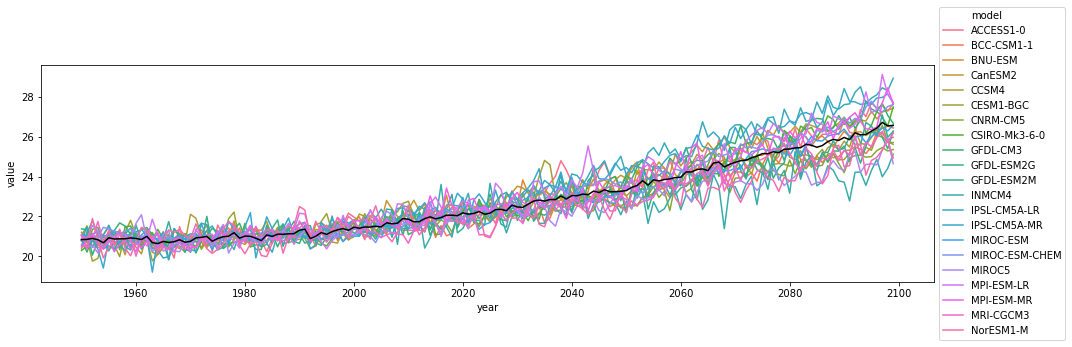

In [31]:
fig, ax = plt.subplots(figsize=(16, 4))

p1 = sns.lineplot(x='year', y='value', hue='model', 
             data=df.loc[(df.variable == 'tasmin') & (df.scen != 'rcp45')], ax=ax, ci=None)

p2 = sns.lineplot(x='year', y='value', 
             data=df.loc[(df.variable == 'tasmin') & (df.scen != 'rcp45')], ax=ax,
             ci=None, color='black')

p1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [35]:
fig.savefig( '../../plots/ensemble_tseries.png', bbox_inches='tight')

In [165]:
ax_top.get_xticks()

array([1971])

In [157]:
df_to_plot = df.loc[((df.variable == 'tasmax') &
                    (np.isin(df.tslice, ['baseline', 'near', 'far'])))]

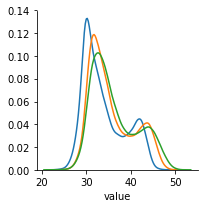

In [141]:
sns.FacetGrid(df_to_plot, hue="scen").map(sns.kdeplot, "value")

In [158]:
gr = df_to_plot.groupby(['scen', 'tslice']).value

In [159]:
tslice_scen_ordered = [('historical', 'baseline'), 
                       ('rcp45', 'near'), 
                       ('rcp45', 'far'), 
                       ('rcp85', 'near'), 
                       ('rcp85', 'far')]

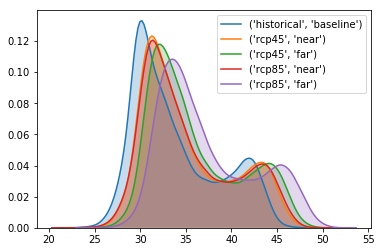

In [161]:
for label in tslice_scen_ordered:
    sns.kdeplot(gr.get_group(label), label=label, shade=True)
    
# plt.xlim(-1, 100)

In [155]:
gr.get_group(('historical', 'baseline'))

28470      0.000000
28473      0.000000
28476      0.000000
28479      0.000000
28482      0.000000
28485      0.000000
28488      0.000000
28491      0.000000
28494      0.000000
28497      0.000000
28500      0.000000
28503      0.000000
28506      0.000000
28509      0.000000
28512      0.000000
28515      0.000000
28518      0.000000
28521      0.000000
28524      0.000000
28527      0.000000
28530      0.000000
28533      0.000000
28536      0.000000
28539      0.000000
28542      0.000000
28545      0.000000
28548      0.000000
28551      0.000000
28554      0.000000
28557      0.000000
             ...   
1287630    0.000000
1287633    0.000000
1287636    0.000000
1287639    0.000000
1287642    0.000000
1287645    0.000000
1287648    0.000000
1287651    0.000000
1287654    0.000000
1287657    0.000000
1287660    0.000000
1287663    0.000000
1287666    0.000000
1287669    0.000000
1287672    0.000000
1287675    0.000000
1287678    0.000000
1287681    0.000000
1287684    0.000000


In [167]:
arr = range(100)

In [168]:
arr

range(0, 100)

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

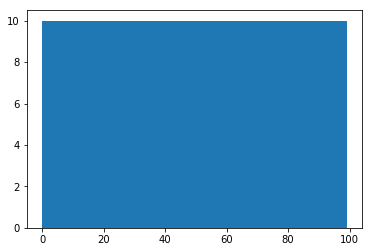

In [171]:
plt.